# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm.notebook import tqdm

# Importing Data

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

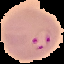

In [6]:
load_img(r'C:\DataScience_ML\5.SPECIALIZATION\1. Deep Learning\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png',target_size=(64,64))

In [7]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [8]:
image_dir = r"C:\DataScience_ML\5.SPECIALIZATION\1. Deep Learning\Malarial Cell Image Data\cell_images"
size = 64
dataset = []
label = []

In [9]:
parasitized_img = os.listdir(image_dir+"\\Parasitized")

for i,img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Parasitized\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(0)

  0%|          | 0/13800 [00:00<?, ?it/s]

In [10]:
uninfected_img = os.listdir(image_dir+"\\Uninfected")

for i,img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Uninfected\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/4133 [00:00<?, ?it/s]

In [11]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.2 ,random_state = 0)

## CNN Architecture

In [12]:
Input_shape = (size,size,3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)

In [13]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [14]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 10,validation_split=0.1,shuffle=False)

Epoch 1/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.6384 - loss: 0.7604 - val_accuracy: 0.2892 - val_loss: 2.1286
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.8154 - loss: 0.4186 - val_accuracy: 0.5296 - val_loss: 2.0995
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 34s 166ms/step - accuracy: 0.9012 - loss: 0.2353 - val_accuracy: 0.8286 - val_loss: 0.5800
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 35s 172ms/step - accuracy: 0.9249 - loss: 0.1939 - val_accuracy: 0.9101 - val_loss: 0.2119
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 33s 162ms/step - accuracy: 0.9293 - loss: 0.1761 - val_accuracy: 0.9261 - val_loss: 0.1884
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.9346 - loss: 0.1644 - val_accuracy: 0.9206 - val_loss: 0.2127
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.9470 - loss: 0.1406 - val_accuracy: 0.9185 - val_loss: 0.2248
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.9550 - loss: 0

In [15]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9488 - loss: 0.1411
Test accuracy: 94.70%


In [17]:
model.save(r"C:\DataScience_ML\5.SPECIALIZATION\1. Deep Learning\malaria_cell.h5")